In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [24]:
tweets = pd.read_csv('./../train.csv')
tweets = tweets.drop(columns=['id'])
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(1), object(3)
memory usage: 238.0+ KB


In [27]:
tweets['length'] = tweets['text'].map(lambda x: len(x))
tweets['has_location'] = tweets['location'].isna()
tweets.groupby(['has_location']).size()

has_location
False    5080
True     2533
dtype: int64

In [28]:
tweets['palabras'] = tweets['text'].apply(lambda x: len(str(x).split()))

In [29]:
tweets.location.value_counts()

USA                      104
New York                  71
United States             50
London                    45
Canada                    29
                        ... 
Eau Claire, Wisconsin      1
WORLDWI$E                  1
Mountains                  1
Kuwait                     1
West Hollywood, CA         1
Name: location, Length: 3341, dtype: int64

In [30]:
def non_alphanum(x):
    return len(re.findall(r'[^a-zA-Z0-9 ]',x))
def arrobas(x):
    return len(re.findall(r'@[a-zA-z0-9_]',x))
def hashtags(x): 
    return len(re.findall(r'#[a-zA-z0-9_]',x))
tweets['menciones'] = tweets['text'].map(lambda x: hashtags(x))
tweets['arrobas'] = tweets['text'].map(lambda x: arrobas(x))
tweets['simbolos'] = tweets['text'].map(lambda x: non_alphanum(x))

tweets.sort_values(by=['menciones'], ascending=False)

,keyword,location,text,target,length,has_location,palabras,menciones,arrobas,simbolos
4483,hostages,NaN,No #news of #hostages in #Libya\n\nhttp://t.co...,1,139,True,18,13,0,27
4468,hostages,NaN,No #news of #hostages in #Libya\n\nhttp://t.co...,1,139,True,18,13,0,27
4480,hostages,NaN,No #news of #hostages in #Libya\n\nhttp://t.co...,1,139,True,18,13,0,27
7197,weapon,Washington DC,Rare insight into #terror and How to fight it ...,1,140,False,22,13,0,18
318,armageddon,NaN,RT @RTRRTcoach: #Love #TrueLove #romance lith ...,0,133,True,15,11,1,17
...,...,...,...,...,...,...,...,...,...,...
3602,fatal,??? ???? ??????,Investigators shift focus to cause of fatal Wa...,1,79,False,10,0,0,5
3601,fatal,"Jaipur, Rajasthan, India",Success is not permanent &amp; failure is not ...,0,52,False,9,0,0,3
3600,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1,136,True,20,0,0,9
3599,fatal,NaN,@spookyfob @feelslikefob I am okay thank you y...,0,118,True,19,0,2,4


In [31]:
fake_tweets = tweets.loc[tweets['target'] == 0]
legit_tweets = tweets.loc[tweets['target'] == 1]

,keyword,location,text,target,length,has_location,palabras,menciones,arrobas,simbolos
15,NaN,NaN,What's up man?,0,14,True,3,0,0,2
16,NaN,NaN,I love fruits,0,13,True,3,0,0,0
17,NaN,NaN,Summer is lovely,0,16,True,3,0,0,0
18,NaN,NaN,My car is so fast,0,17,True,5,0,0,0
19,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28,True,3,0,0,6
...,...,...,...,...,...,...,...,...,...,...
7581,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104,False,13,0,1,8
7582,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,80,True,11,0,0,9
7584,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,127,True,13,1,0,11
7587,NaN,NaN,Sirens everywhere!,0,18,True,2,0,0,1


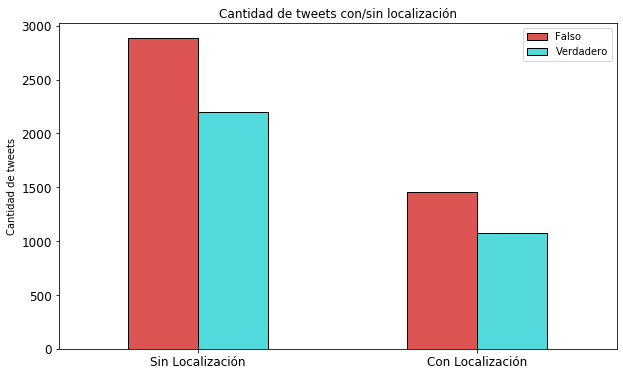

In [93]:
locations_plt = tweets.groupby(['has_location', 'target']).size().unstack().plot(kind='bar', rot=0, color=['#DC5552', '#52D9DC'],edgecolor='black', figsize=(10,6), fontsize=12, title="Cantidad de tweets con/sin localización")
locations_plt.set_ylabel("Cantidad de tweets")
locations_plt.set_xlabel("")
locations_plt.set_xticklabels(['Sin Localización', 'Con Localización'])
locations_plt.legend(labels = ['Falso', 'Verdadero'])
locations_plt.get_figure().savefig('mivieja.png')

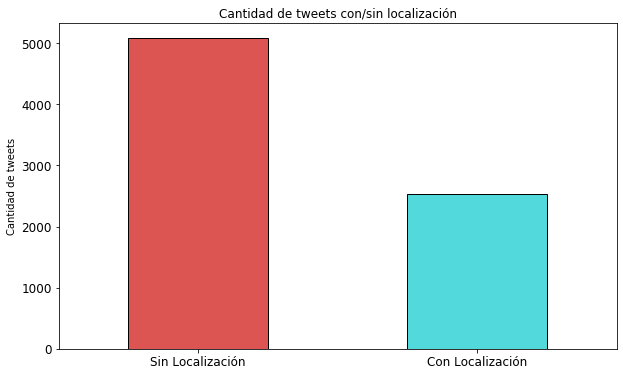

In [94]:
locations_plt = tweets.groupby(['has_location']).size().plot(kind='bar', rot=0, color=['#DC5552', '#52D9DC'],edgecolor='black', figsize=(10,6), fontsize=12, title="Cantidad de tweets con/sin localización")
locations_plt.set_ylabel("Cantidad de tweets")
locations_plt.set_xlabel("")
locations_plt.set_xticklabels(['Sin Localización', 'Con Localización'])
locations_plt.get_figure().savefig('mivieja.png')

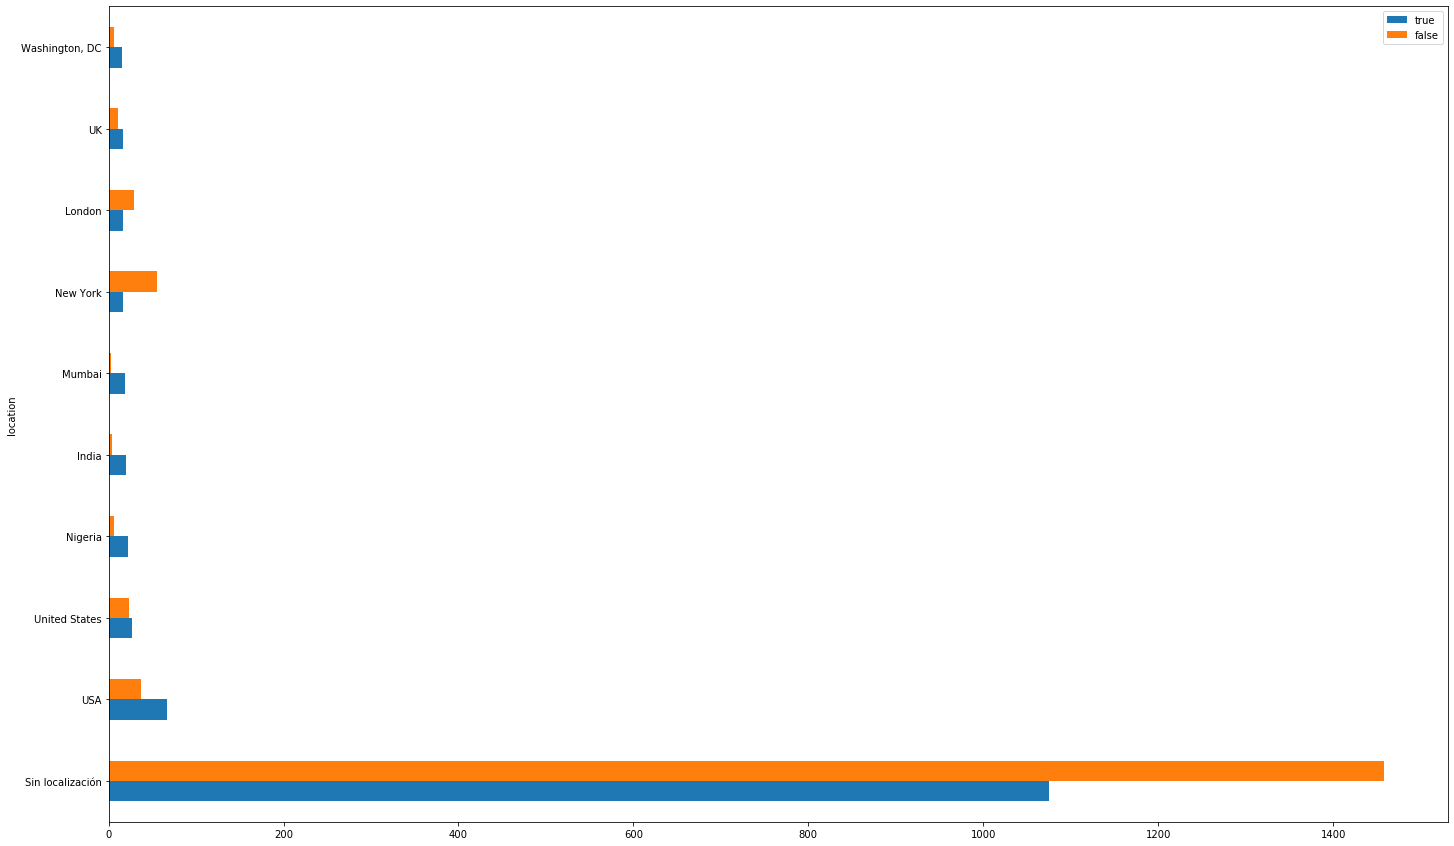

In [13]:
legit_location = legit_tweets.location.value_counts(sort=True).reset_index().rename(columns={'index': 'location', 'location': 'true'}).set_index('location')
fake_location = fake_tweets.location.value_counts(sort=True).reset_index().rename(columns={'index': 'location', 'location': 'false'}).set_index('location')
legit_location.join(fake_location).sort_values(by=['true', 'false'], ascending=False).head(10).plot(kind='barh', figsize=(24,15), rot=0)

In [12]:
fsize = (10,4)
fig, ax = plt.subplots(figsize=fsize)
bars1 = types['true'].tolist()
bars2 = types['false'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.bar(legit_tweets[, bars1, color='#52D9DC', width=0.4, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.4, edgecolor='white', label='Falsos')
ax.set_title('Tipos de Palabra (V vs F).',fontweight='bold')
ax.set_ylabel('Porcentaje(%)',fontweight='bold')
ax.set_xlabel('Tipos',fontweight='bold')
ax.set_yticks([])
ax.set_xticks(types['Tag'].tolist())
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
ax.set_xticklabels(types['Tag'].tolist(),ha='left')
plt.legend()
plt.savefig("locations.png", dpi=500)

SyntaxError: invalid syntax (<ipython-input-12-9dc068d0b94a>, line 7)

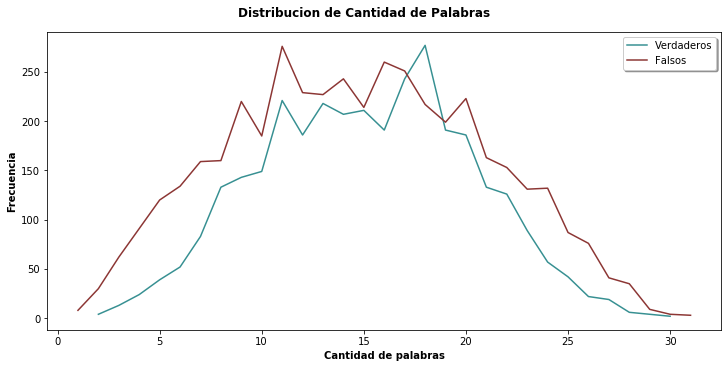

In [75]:
ttox = legit_tweets['palabras'].value_counts().sort_index()

ftox = fake_tweets['palabras'].value_counts().sort_index()

fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
fig.suptitle('Distribucion de Cantidad de Palabras',fontweight='bold')
ax.plot(ttox.index,ttox.values, color='#379092', label = 'Verdaderos')
ax.plot(ftox.index,ftox.values, color='#8C3634', label = 'Falsos')
legend = ax.legend(loc='best', shadow=True)
#####################################################################################
ax.set_ylabel('Frecuencia',fontweight='bold')
ax.set_xlabel('Cantidad de palabras',fontweight='bold')
#####################################################################################
plt.show()

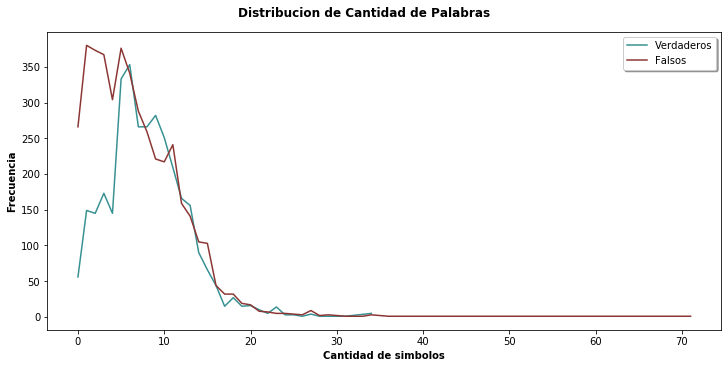

In [76]:
ttox = legit_tweets['simbolos'].value_counts().sort_index()

ftox = fake_tweets['simbolos'].value_counts().sort_index()

fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
fig.suptitle('Distribucion de Cantidad de Palabras',fontweight='bold')
ax.plot(ttox.index,ttox.values, color='#379092', label = 'Verdaderos')
ax.plot(ftox.index,ftox.values, color='#8C3634', label = 'Falsos')
legend = ax.legend(loc='best', shadow=True)
#####################################################################################
ax.set_ylabel('Frecuencia',fontweight='bold')
ax.set_xlabel('Cantidad de simbolos',fontweight='bold')
#####################################################################################
plt.show()